In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import neighbors, metrics, model_selection
%matplotlib widget

In [2]:
# data_train = np.array([[0.3, 0.1],
#                        [0.2, 0.6],
#                        [0.4, 0.2],
#                        [0.7, 0.1],
#                        [0.6, 0.2],
#                        [0.2, 0.3],
#                        [0.1, 0.7],
#                        [0.8, 0.4],
#                        [0.1, 0.4],
#                        [0.3, 0.9],
#                        [0.4, 0.8],
#                        [0.9, 0.3]])

# label_train = np.array([0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1])

In [3]:
dataset = np.array([[0.4, 700], # 0
                    [0.8, 400], # 1
                    [0.3, 350], # 2
                    [0.6, 550], # 3
                    [0.5, 800], # 4
                    [0.3, 100], # 5
                    [0.6, 200], # 6
                    [0.7, 750], # 7
                    [0.4, 400], # 8
                    [0.8, 150], # 9
                    [0.9, 300], # 10
                    [0.8, 700], # 11
                    [0.4, 150], # 12
                    [0.5, 300], # 13
                    [0.2, 200], # 14
                    [0.7, 250], # 15
                   ])

labels_ds = np.array([1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2])

In [4]:
df_dataset = pd.DataFrame(dataset, columns=['excentricidade', 'area'])
df_dataset['classe'] = labels_ds

display(df_dataset)

,excentricidade,area,classe
0,0.4,700.0,1
1,0.8,400.0,2
2,0.3,350.0,0
3,0.6,550.0,1
4,0.5,800.0,1
5,0.3,100.0,0
6,0.6,200.0,2
7,0.7,750.0,1
8,0.4,400.0,0
9,0.8,150.0,2


Text(0, 0.5, 'area')

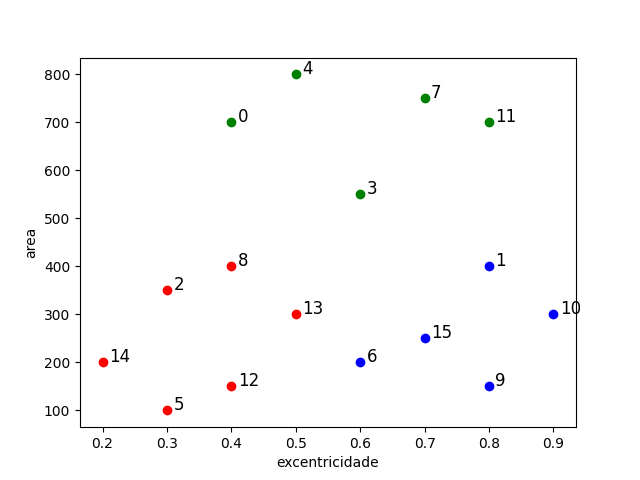

In [5]:
plt.figure()
plt.scatter(df_dataset.loc[df_dataset['classe']==0]['excentricidade'], 
            df_dataset.loc[df_dataset['classe']==0]['area'], 
            color='r')
plt.scatter(df_dataset.loc[df_dataset['classe']==1]['excentricidade'], 
            df_dataset.loc[df_dataset['classe']==1]['area'], 
            color='g')
plt.scatter(df_dataset.loc[df_dataset['classe']==2]['excentricidade'], 
            df_dataset.loc[df_dataset['classe']==2]['area'], 
            color='b')

for i, (x, y) in enumerate(zip(df_dataset['excentricidade'],  df_dataset['area'])):
    plt.text(x+0.01, y+0.01, str(i), color="black", fontsize=12)

plt.xlabel('excentricidade')
plt.ylabel('area')

(0.165, 0.935, 65.0, 835.0)

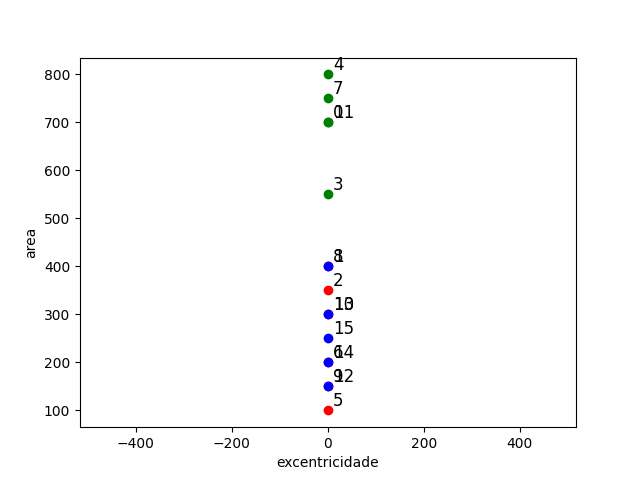

In [6]:
plt.figure()
plt.scatter(df_dataset.loc[df_dataset['classe']==0]['excentricidade'], 
            df_dataset.loc[df_dataset['classe']==0]['area'], 
            color='r')
plt.scatter(df_dataset.loc[df_dataset['classe']==1]['excentricidade'], 
            df_dataset.loc[df_dataset['classe']==1]['area'], 
            color='g')
plt.scatter(df_dataset.loc[df_dataset['classe']==2]['excentricidade'], 
            df_dataset.loc[df_dataset['classe']==2]['area'], 
            color='b')

for i, (x, y) in enumerate(zip(df_dataset['excentricidade'],  df_dataset['area'])):
    plt.text(x+10, y+10, str(i), color="black", fontsize=12)

plt.xlabel('excentricidade')
plt.ylabel('area')

plt.axis('equal')

In [7]:
# data_test = np.array([[0.3, 0.6],
#                       [0.1, 0.5],
#                       [0.6, 0.3]])

# df_test = pd.DataFrame(data_test, columns=['excentricidade', 'circularidade'])

# display(df_test)

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_dataset, 
                                                                    labels_ds, 
                                                                    test_size=0.25, 
                                                                    random_state=42)

In [9]:
display(X_train)
display(X_test)

,excentricidade,area,classe
13,0.5,300.0,0
11,0.8,700.0,1
8,0.4,400.0,0
9,0.8,150.0,2
2,0.3,350.0,0
15,0.7,250.0,2
4,0.5,800.0,1
7,0.7,750.0,1
10,0.9,300.0,2
12,0.4,150.0,0


,excentricidade,area,classe
0,0.4,700.0,1
1,0.8,400.0,2
5,0.3,100.0,0
14,0.2,200.0,0


Text(0, 0.5, 'area')

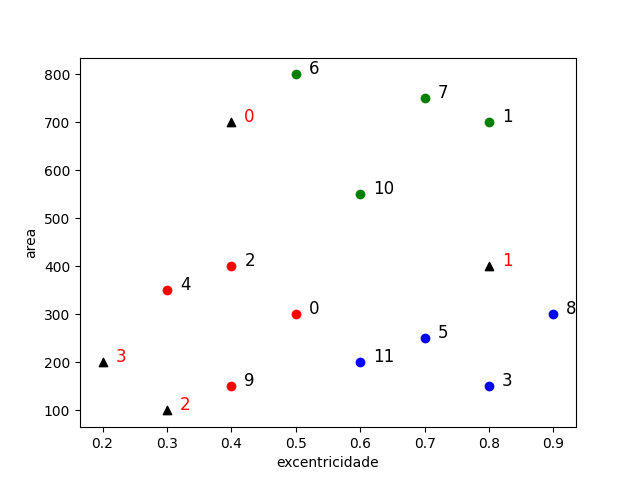

In [10]:
plt.figure()
plt.scatter(X_train.loc[X_train['classe']==0]['excentricidade'], 
            X_train.loc[X_train['classe']==0]['area'], 
            color='r')
plt.scatter(X_train.loc[X_train['classe']==1]['excentricidade'], 
            X_train.loc[X_train['classe']==1]['area'], 
            color='g')
plt.scatter(X_train.loc[X_train['classe']==2]['excentricidade'], 
            X_train.loc[X_train['classe']==2]['area'], 
            color='b')

for i, (x, y) in enumerate(zip(X_train['excentricidade'],  X_train['area'])):
    plt.text(x+0.02, y+0.02, str(i), color="black", fontsize=12)

for i, (x, y) in enumerate(zip(X_test['excentricidade'],  X_test['area'])):
    plt.text(x+0.02, y+0.02, str(i), color="red", fontsize=12)

plt.scatter(X_test['excentricidade'], 
            X_test['area'], 
            marker='^', 
            color='k')

plt.xlabel('excentricidade')
plt.ylabel('area')

(0.165, 0.935, 65.0, 835.0)

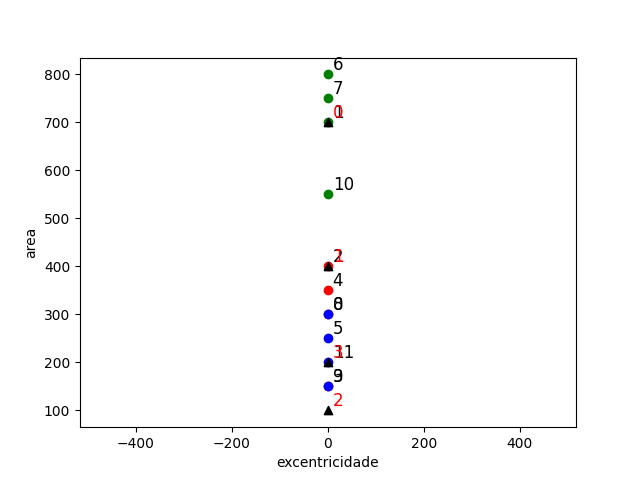

In [11]:
plt.figure()
plt.scatter(X_train.loc[X_train['classe']==0]['excentricidade'], 
            X_train.loc[X_train['classe']==0]['area'], 
            color='r')
plt.scatter(X_train.loc[X_train['classe']==1]['excentricidade'], 
            X_train.loc[X_train['classe']==1]['area'], 
            color='g')
plt.scatter(X_train.loc[X_train['classe']==2]['excentricidade'], 
            X_train.loc[X_train['classe']==2]['area'], 
            color='b')

for i, (x, y) in enumerate(zip(X_train['excentricidade'],  X_train['area'])):
    plt.text(x+10, y+10, str(i), color="black", fontsize=12)

for i, (x, y) in enumerate(zip(X_test['excentricidade'],  X_test['area'])):
    plt.text(x+10, y+10, str(i), color="red", fontsize=12)

plt.scatter(X_test['excentricidade'], 
            X_test['area'], 
            marker='^', 
            color='k')

plt.xlabel('excentricidade')
plt.ylabel('area')

plt.axis('equal')

In [12]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [13]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train[X_train.columns[:-1]].mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train[X_train.columns[:-1]].std(0)

In [14]:
for c in X_train.columns[:-1]:
    print(f'{c}:\t{X_train[c].mean(0):.4f} +/- {X_train[c].std(0):.4f}') 

for c in X_test.columns[:-1]:
    print(f'{c}:\t{X_test[c].mean(0):.4f} +/- {X_test[c].std(0):.4f}') 

excentricidade:	0.6000 +/- 0.1859
area:	408.3333 +/- 234.3592
excentricidade:	0.4250 +/- 0.2630
area:	350.0000 +/- 264.5751


In [15]:
# Transformada Normal de Caracteristicas
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

X_train_norm[X_train.columns[:-1]] = (X_train[X_train.columns[:-1]] - X_train_mean) / X_train_std
X_test_norm[X_train.columns[:-1]] = (X_test[X_test.columns[:-1]] - X_train_mean) / X_train_std

In [16]:
display(X_train_norm)
display(X_test_norm)

,excentricidade,area,classe
13,-0.538028,-0.462253,0
11,1.076055,1.244528,1
8,-1.076055,-0.035558,0
9,1.076055,-1.102296,2
2,-1.614083,-0.248906,0
15,0.538028,-0.675601,2
4,-0.538028,1.671224,1
7,0.538028,1.457876,1
10,1.614083,-0.462253,2
12,-1.076055,-1.102296,0


,excentricidade,area,classe
0,-1.076055,1.244528,1
1,1.076055,-0.035558,2
5,-1.614083,-1.315644,0
14,-2.152110,-0.888949,0


In [17]:
for c in X_train_norm.columns[:-1]:
    print(f'{c}:\t{X_train_norm[c].mean(0):.4f} +/- {X_train_norm[c].std(0):.4f}') 

for c in X_test_norm.columns[:-1]:
    print(f'{c}:\t{X_test_norm[c].mean(0):.4f} +/- {X_test_norm[c].std(0):.4f}') 


excentricidade:	0.0000 +/- 1.0000
area:	0.0000 +/- 1.0000
excentricidade:	-0.9415 +/- 1.4150
area:	-0.2489 +/- 1.1289


Text(0, 0.5, 'area')

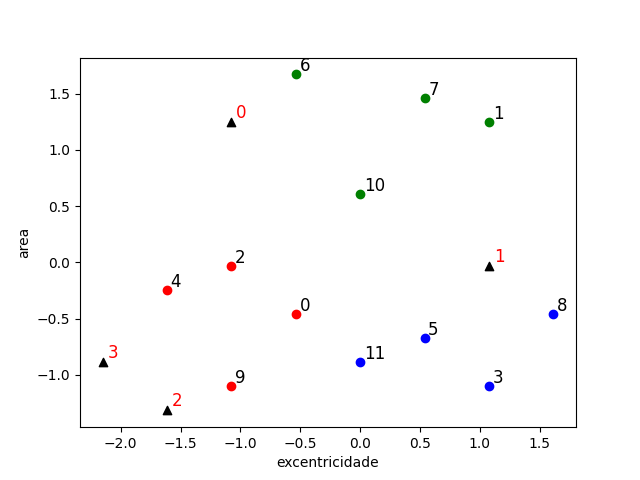

In [18]:
plt.figure()
plt.scatter(X_train_norm.loc[X_train_norm['classe']==0]['excentricidade'], 
            X_train_norm.loc[X_train_norm['classe']==0]['area'], 
            color='r')
plt.scatter(X_train_norm.loc[X_train_norm['classe']==1]['excentricidade'], 
            X_train_norm.loc[X_train_norm['classe']==1]['area'], 
            color='g')
plt.scatter(X_train_norm.loc[X_train_norm['classe']==2]['excentricidade'], 
            X_train_norm.loc[X_train_norm['classe']==2]['area'], 
            color='b')

for i, (x, y) in enumerate(zip(X_train_norm['excentricidade'],  X_train_norm['area'])):
    plt.text(x+0.03, y+0.03, str(i), color="black", fontsize=12)

plt.scatter(X_test_norm['excentricidade'], 
            X_test_norm['area'], 
            marker='^', 
            color='k')

for i, (x, y) in enumerate(zip(X_test_norm['excentricidade'],  X_test_norm['area'])):
    plt.text(x+0.04, y+0.04, str(i), color="red", fontsize=12)

plt.xlabel('excentricidade')
plt.ylabel('area')

(-2.340420002793021,
 1.802392415944051,
 -1.4649875445706446,
 1.8205670456800245)

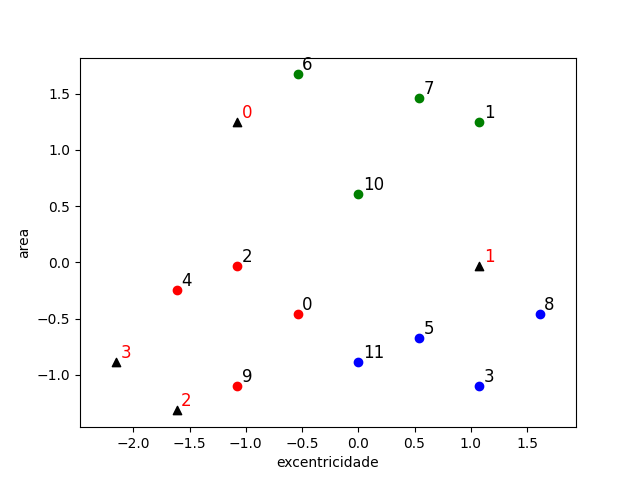

In [19]:
plt.figure()
plt.scatter(X_train_norm.loc[X_train_norm['classe']==0]['excentricidade'], 
            X_train_norm.loc[X_train_norm['classe']==0]['area'], 
            color='r')
plt.scatter(X_train_norm.loc[X_train_norm['classe']==1]['excentricidade'], 
            X_train_norm.loc[X_train_norm['classe']==1]['area'], 
            color='g')
plt.scatter(X_train_norm.loc[X_train_norm['classe']==2]['excentricidade'], 
            X_train_norm.loc[X_train_norm['classe']==2]['area'], 
            color='b')

for i, (x, y) in enumerate(zip(X_train_norm['excentricidade'],  X_train_norm['area'])):
    plt.text(x+0.04, y+0.04, str(i), color="black", fontsize=12)

plt.scatter(X_test_norm['excentricidade'], 
            X_test_norm['area'], 
            marker='^', 
            color='k')

for i, (x, y) in enumerate(zip(X_test_norm['excentricidade'],  X_test_norm['area'])):
    plt.text(x+0.04, y+0.04, str(i), color="red", fontsize=12)

plt.xlabel('excentricidade')
plt.ylabel('area')

plt.axis('equal')

In [20]:
print('\nDone!')


Done!
